1. 

En el archivo "logistic_regression_df_class" hemos visto un ejemplo multiclase. Realiza un análisis con regresión linear multinominal teniendo como target la columna "duración". Es decir, averigua cuánto aumentan o disminuyen la duración cuando se aumenta una unidad los valores de las demás columnas.

- ¿Qué acierto tiene? (score)
- ¿Cuál es el RMSE? ¿Dirías que es un valor alto?
- Viendo la matriz de correlación, ¿tienen coherencia los resultados de la regresión?
- ¿Es la regresión un buen método para este dataset?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error 

In [2]:
win = pd.read_csv("https://raw.githubusercontent.com/Gabvaztor/data_science_apr_2021/main/week9_ML_svm_poly_norm/day1_logistic_regresion_confusion_matrix/data/usuarios_win_mac_lin.csv")
win.head()

,duracion,paginas,acciones,valor,clase
0,7.0,2,4,8,2
1,21.0,2,6,6,2
2,57.0,2,4,4,2
3,101.0,3,6,12,2
4,109.0,2,6,12,2


In [3]:
win.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   duracion  170 non-null    float64
 1   paginas   170 non-null    int64  
 2   acciones  170 non-null    int64  
 3   valor     170 non-null    int64  
 4   clase     170 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 6.8 KB


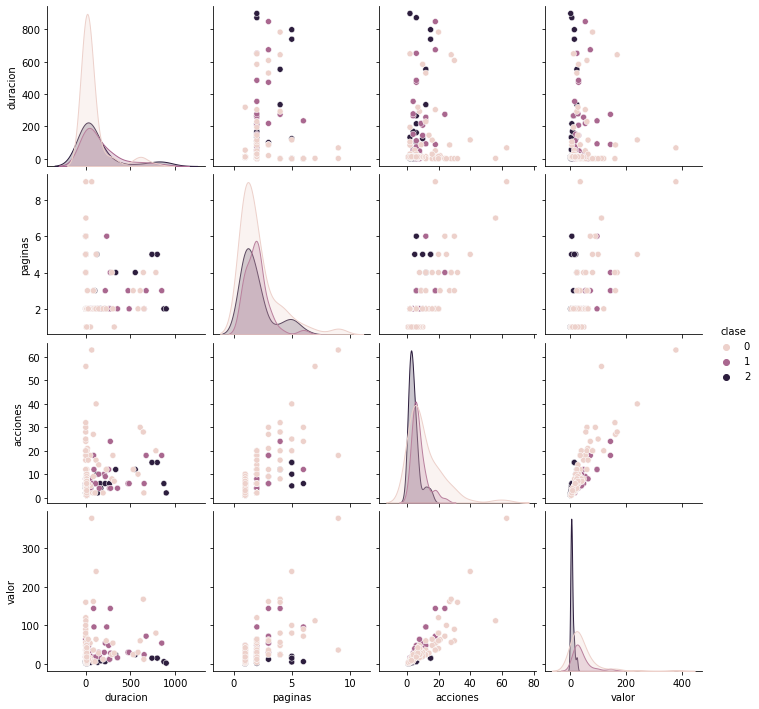

In [4]:
sns.pairplot(win, hue = "clase")

In [5]:
X = win.drop("duracion", 1)
y = win.duracion

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [7]:
model = LinearRegression()

In [8]:
model.fit(X_train,y_train)

LinearRegression()

In [9]:
model.intercept_

3.1952716999406903

In [10]:
model.coef_

array([55.79701134, -0.61822571, -0.47555934, 24.10621202])

In [11]:
df_coef = pd.DataFrame(model.coef_, X.columns, columns=['coef_'])
df_coef

,coef_
paginas,55.797011
acciones,-0.618226
valor,-0.475559
clase,24.106212


In [12]:
prediction = model.predict(X_test)
prediction

array([477.12017493, 123.77272808,  43.86950472, 167.17156765,
       210.02408733, 102.49667394, 108.64994976, 231.77106734,
       105.01713699,  86.54109554, 156.7243409 , 106.11092204,
        70.49617979, 103.92335195, 207.5511845 ,  72.68374988,
       151.75417316, 255.76360854,  56.94737932, 309.01114697,
        74.46188553, 379.62705352,  52.04911959,  54.2842499 ,
       313.98597679, 105.6353627 , 106.11092204, 110.69948695,
        35.02410392,  73.89122004,  46.437528  , 127.64332767,
       105.01713699,  77.98102748])

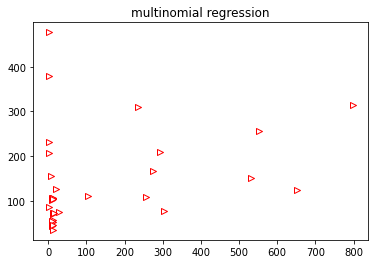

In [13]:
plt.scatter(y_test, prediction, color='white', marker = ">", edgecolor = "red")
plt.title("multinomial regression")
plt.show()

**¿Qué acierto tiene? (score)**

In [14]:
model.score(X, y)

0.09214171816339234

R² < 0.5 → Ajuste débil


In [15]:
model.score(X_train, y_train)

0.10224431168624526

In [16]:
model.score(X_test, y_test)

0.050573956895726524

R² no representa cómo de bueno es el modelo, sino la `fuerza de ajuste` que significa que, en promedio, sus valores predichos (y_pred) no se desvían mucho de sus datos reales (y). 

Corresponde a un 9.21% en general. Un score de 10,22% en entrenamiento y 5,05% en test.

**¿Cuál es el RMSE? ¿Dirías que es un valor alto?**

In [17]:
print(f'RMSE train: {np.sqrt(mean_squared_error(y_train, model.predict(X_train)))}')

RMSE train: 189.04255917987973


In [18]:
print(f'RMSE test: {np.sqrt(mean_squared_error(y_test, prediction))}')

RMSE test: 204.96463678861517


In [19]:
print("max:", max(y), "\nmin:", min(y))

max: 898.0 
min: 1.0


Es importante recordar que RMSE tiene la misma unidad que la variable dependiente ('duración'). Significa que no hay un umbral absoluto bueno o malo, sin embargo, puede definirlo en función de su variable dependiente. Para un dato que va de 0 a 1000, un RMSE de 0,7 es pequeño, pero si el rango va de 0 a 1, ya no es tan pequeño. Sin embargo, aunque cuanto más pequeño sea el RMSE, mejor, puede hacer afirmaciones teóricas sobre los niveles del RMSE si sabe lo que se espera de la variable 'duración'.
En este caso el rango va de 1 a 898, por lo que un valor de RMSE de 204.96 es relativamente alto. 

No puede fijar un valor de umbral particular para RMSE. Tenemos que analizar la comparación de RMSE de los conjuntos de datos de test y de train. Si el modelo es bueno, entonces su RMSE de datos de test es bastante similar al conjunto de datos de entrenamiento. De lo contrario, se cumplen las condiciones siguientes:
```
RMSE de test > RMSE de train => overfitting de los datos.
RMSE de test < RMSE de train => underfitting de los datos.
```

**Viendo la matriz de correlación, ¿tienen coherencia los resultados de la regresión?**

In [20]:
corr_matrix = win.corr()
corr_matrix

,duracion,paginas,acciones,valor,clase
duracion,1.000000,0.277550,0.163028,0.090869,0.128706
paginas,0.277550,1.000000,0.724061,0.583910,-0.052813
acciones,0.163028,0.724061,1.000000,0.862961,-0.329954
valor,0.090869,0.583910,0.862961,1.000000,-0.322737
clase,0.128706,-0.052813,-0.329954,-0.322737,1.000000


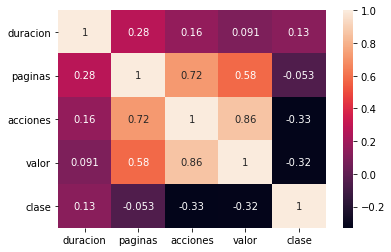

In [21]:
sns.heatmap(corr_matrix, annot = True)

No existe correlación entre la duración y el resto de variables.

**¿Es la regresión un buen método para este dataset?**

Observando los datos que tenemos vemos que al ser valores continuos lo que encontramos en la columna `duración`, este es un problema de regresión.

Pero en todo caso, la regresión linear es un buen método solo para las columnas `acciones` y `valor` que como se observa más abajo, hay una relación lineal entre ellas. 

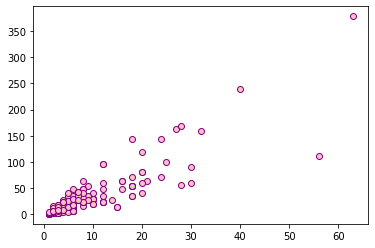

In [22]:
plt.scatter(win.acciones, win.valor, color='pink', edgecolor = "purple")

In [23]:
X_2 = np.array(win.acciones).reshape(-1,1)
y_2 = win.valor

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.20)

model_2 = LinearRegression()

model_2.fit(X_train_2, y_train_2)

model_2.predict(X_test_2)

array([ 4.21661804e+00, -2.08350222e-02,  4.21661804e+00,  8.04907731e+01,
       -2.08350222e-02,  4.21661804e+00,  8.45407109e+00,  2.11664303e+01,
        8.45407109e+00,  2.54038833e+01,  8.45407109e+00,  8.45407109e+00,
        8.45407109e+00,  2.96413364e+01,  2.11664303e+01,  6.35409608e+01,
        2.96413364e+01,  2.96413364e+01,  2.11664303e+01,  1.69289772e+01,
        2.11664303e+01,  3.81162425e+01,  1.69289772e+01,  8.45407109e+00,
        1.69289772e+01, -2.08350222e-02,  2.11664303e+01,  2.54038833e+01,
        1.26915242e+01,  2.11664303e+01,  4.21661804e+00,  2.11664303e+01,
        4.65911486e+01,  4.65911486e+01])

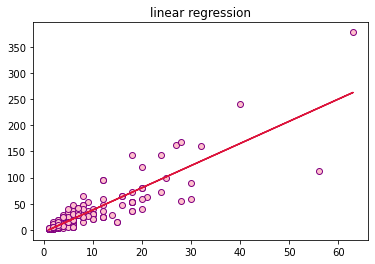

In [24]:
plt.scatter(X_2, y_2, color='pink', edgecolor = "purple")
plt.plot(X_2, model_2.predict(X_2), color='crimson')
plt.title("linear regression")
plt.show()

In [25]:
model_2.score(X_2, y_2)

0.7446961180777925

In [26]:
model_2.score(X_test_2, y_test_2)

0.7367376643888055